# Apache Spark и PySpark
*Apache Spark* был создан для быстрого анализа больших данных. Одной из важных функций, которые предлагает Apache Spark, является возможность выполнять вычисления в памяти. Он также считается более эффективным по сравнению с *MapReduce* для сложных приложений, работающих на Диске.

Spark обеспечивает высокую доступность, предлагая простые API-интерфейсы на Python, Java, Scala и SQL, а также богатые встроенные библиотеки. Он также тесно интегрируется с другими инструментами больших данных. В частности, Spark может работать в кластерах Hadoop и получать доступ к любому источнику данных Hadoop, включая Cassandra.

*PySpark* - это интерфейс, обеспечивающий доступ к Spark с помощью языка программирования Python. PySpark может использоваться для распределенных вычислений на Python в рамках анализа и обработки больших данных, а также машинного обучения.<br/>
PySpark взаимодействует с самим Spark через специальную библиотеку [Py4J](https://www.py4j.org/). Она позволяет программам Python, которые выполняются интерпретатором, динамически обращаться к объектам Java в JVM, транслируя код Scala в JVM. Для большей совместимости PySpark поддерживает парадигму функционального программирования, т.к., во-первых, язык Scala является функциональным, во-вторых, функциональный код намного проще распараллелить. Таким образом, PySpark позволяет проводить параллельную обработку без необходимости использования каких-либо модулей Python для потоковой или многопроцессорной обработки. Вся сложная коммуникация и синхронизация между потоками, процессами и даже разными CPU обрабатываются в Spark.

Чтобы запустить Spark в Google Colab, сначала необходимо установить все зависимости, такие как Apache Spark с Hadoop и платформу Java. В качестве платформы Java можно взять свободный JDK (Java development kit), актуальны версии 8+. Ссылка для скачивания Apache Spark доступна на главной странице [Apache Software Foundation](https://www.apache.org/) на вкладке Downloads. Скачанный архив нужно разархивировать командой `tar`. Установка инструментов может быть выполнена внутри Jupyter Notebook в Colab.

In [1]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
!tar xf spark-3.4.2-bin-hadoop3.tgz

После этого в окружение среды нужно указать пути *JAVA_HOME* и *SPARK_HOME* на скачанные программы. Поскольку Spark загружен напрямую, он находится в директории *content*. Воспользуемся модулем `os`, который предоставляет интерфейс для взаимодействия с файловой системой.

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"

Чтобы использовать PySpark как обычную Python-библиотеку, дополнительно необходимо установить `findspark`:

In [3]:
!pip install findspark

Далее необходимо проинициализировать PySpark. Для этого вызывается метод `findspark.init()`, затем создаётся точка входа кластера. Для этого, в первую очередь, Spark создает S*parkContext* — объект, который определяет, как получить доступ к кластеру в момент выполнения программы. Также через *SparkConf* определяются параметры конфигурации. К ним может относиться кластерный менеджер (master), с которым соединяется приложение через URL (т.е. каким образом следует подключиться — локально, к Kubernates или YARN и т.д.), название приложения, количество выделяемых ядер и т.д. (с полным списком можно ознакомиться в [документации](https://spark.apache.org/docs/latest/configuration.html)). Начиная со Spark 2.0, единой точкой входа в Spark-приложение является *SparkSession*, что устраняет необходимость явно создавать *SparkConf* и *SparkContext*, поскольку они инкапсулируются в *SparkSession*. Все функции, которые были доступны в *SparkContext*, доступны и в *SparkSession*.

In [4]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Теперь Colab готов запускать PySpark.

#Pandas и PySpark

Интерфейс *PySpark* во многом похож на интерфейс *Pandas*. В частности, оба используют DataFrame для представления табличных данных, отсюда следует использование множества схожих методов. При разных названиях, они также пересекаются с операциями SQL, например, методы `distinct`, `where` в PySpark соответствуют методам `unique`, `filter` в Pandas.<br/>
Главное отличие между PySpark и Pandas состоит в режиме выполнения. PySpark реализует *lazy execution* (ленивое выполнение), в то время как Pandas — *eager execution* (мгновенное выполнение). Например, требуется загрузить данные на диске и применить к ним операции трансформации (map). Pandas выполнит их тут же. PySpark же сохранит всю последовательность необходимых операций и выполнит их в том случае, когда данные понадобятся.<br/>
Существует возможность довольно просто перейти от PySpark к Pandas и наоборот:
```
# Из Pandas в PySpark
spark_df = spark.createDataFrame(pandasDF)

# Из PySpark в Pandas
pandasDF = spark_df.toPandas()
```




#Доступные в PySpark форматы для чтения и записи
PySpark поддерживает такие основные форматы, как CSV, JSON, ORC, Parquet.
Ниже приведены примеры синтаксиса чтения и записи, который практически одинаков для всех форматов.<br/>

*   CSV (Comma-separated values, значения, разделенные запятыми) — наиболее часто используемый формат для хранения датасетов:
```
data = spark.read.csv(“file.csv”) # прочитать
data.write.csv(”file_dir”, sep=',') # записать
```






*  JSON (JavaScript Object Notation) применяется для сериализации данных, используется также в MongoDB:
```
data = spark.read.json(“file.json”)
data.write.json(”file_dir”)
```
*  ORC (Optimized Row Columnar) — формат хранения данных экосистем Apache Hadoop:
```
data = spark.read.orc(“orc_file”)
data.write.orc()
```
*   Parquet- еще один формат экосистем Apache Hadoop, который может изменяться в соответствии с изменением данных, а также поддерживает слияние схем:
```
data = spark.read.parquet(“parquet_file”)
data.write.parquet(”file_dir”)
```
PySpark также поддерживает функциональный стиль программирования. Например, чтение CSV-файла в этом случае будет выглядеть следующим образом:
```
data = spark.read \
    .format(“json”) \
    .load(“file.json”) \
    .option("header", True)
```













In [ ]:
# Загрузка данных в Spark DataFrame
# df = spark.read.option('header', True).csv("daily_weather.csv")
df = spark.read.load("daily_weather.csv",
                      format='com.databricks.spark.csv',
                      header='true',inferSchema='true') # третий аргумент указывает, что первая строка является заголовком, четвертый аргумент указывает на вывод типов данных

В pyspark датафреймы подсчитываются лениво. При запуске команды pyspark не прозводит вычисления сразу, а лишь планирует их на будущее. Все запланированные вычисления производятся, когда данные действительно понадобятся, при запуске команд-действий, таких как collect(), take() и др.

## Основные этапы предварительной обработки данных
Создание информативного признакового описания очень важно для дальнейшего анализа. Важно также следить за качеством полученных данных. Могут встретиться следующие проблемы: пропуски (пропущенные значения), выбросы, ошибки разметки, дубликаты, data drift (изменение данных с течением времени) и др. Например, если разметка данных производится с привлечением добровольцев, нужно быть готовым к тому, часть из них может содержать ошибки. Не все могут подходить ответственно к выполняемой задаче или для некоторых задача может оказаться слишком трудной.<br/>
С течением времени данные могут меняться, например, может измениться схема сбора данных, и они могут начать приходить в новом формате, неподдерживаемом моделью, или может поменяться распределение данных. С такими проблемами может столкнуться любая система, решающая долгосрочные задачи, поэтому важно мониторить распределение данных и при необходимости вовремя обновлять модель.<br/>
Прежде всего, необходимо понять, что собой представляют анализируемые данные. В этом помогут следующие команды:


In [ ]:
df.show()

+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|number| air_pressure_9am|      air_temp_9am|avg_wind_direction_9am|avg_wind_speed_9am|max_wind_direction_9am|max_wind_speed_9am|rain_accumulation_9am|rain_duration_9am|relative_humidity_9am|relative_humidity_3pm|
+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|     0|918.0600000000087| 74.82200000000041|                 271.1| 2.080354199999768|    295.39999999999986| 2.863283199999908|                  0.0|              0.0|    42.42000000000046|   36.160000000000494|
|     1|917.3476881177097| 71.40384263106537|    101.93517935618371|2.4430092157340217|    140.47154847112498|3.5333236016106238|               

In [ ]:
df.columns # просмотреть столбцы

['number',
 'air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am',
 'relative_humidity_3pm']

In [ ]:
df.printSchema() # вывод типов данных столбцов

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



In [ ]:
df.describe().toPandas().transpose() # сводная статистика по датафрейму

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138094,3.184161180386833,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287072,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.2355107005759,69.13785928889189,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.5528134655317185,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.95351796516923,67.23801294602953,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.598209170780958,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574893,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.0787786601481,0.0,17704.0


In [ ]:
df.describe(['air_temp_9am']).show() # сводная статистика по отдельному столбцу

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



In [ ]:
len(df.columns) # количество столбцов

11

In [ ]:
df.count() # количество строк

1095

При просмотре полученной информации стоит обратить внимание на:
1.	Соответствует ли количество строчек каждой колонки общему количеству строчек?
2.	Какова суть данных в каждой колонке?
3.	Для какой колонки будет проводиться предсказание?
<br/>
Также необходимо помнить, что функция *describe()* не дает информацию о колонках со значениями типа *string*.


Количество строк в датафрейме равно 1095, но сводная статистика по air_pressure_9am показывает, что в данном столбце всего 1090 строк. Это означает, что в данном столбце имеется 1095 - 1090 = 5 строк с пропущенными значениями.

In [ ]:
# удалим строки с пропущенными значениями в столбце air_pressure_9am
df2=df.na.drop(subset=['air_temp_9am'])

Посмотрим на общее количество строк:

In [ ]:
df2.count()

1090

Количество строк в датафрейме и столбце теперь совпадает.

Найти столбцы с отсутствующими значениями можно с помощью визуализации, например, используя тепловую карту. Желтым цветом будут отмечены те значения внутри столбцов, которые отсутствуют.

<Axes: >

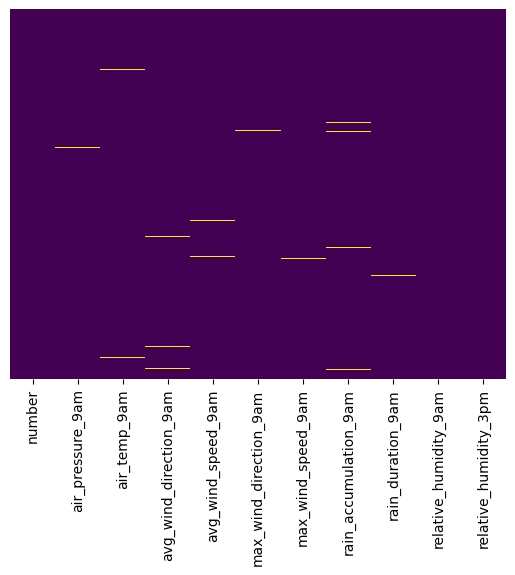

In [ ]:
import seaborn as sns
sns.heatmap(df.toPandas().isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Заполнение пропущенных значений
В реальных наборах данных отсутствующие значения встречаются довольно часто, что может негативно влиять на производительность модели. Необходимо учитывать, что за пустые значения принимается также NaN, а в некоторых случаях и 0 может означать пустое значение. Является ли 0 числовым значением или означает отсутствующее значение, необходимо анализировать в каждом отдельном случае.
Объекты или признаки, в которых есть пропуски, можно удалять из выборки. Если колонка имеет более 50% пустых значений, ее можно безболезненно удалить. Если после удаления строчек с пустыми значениями в некоторых колонках останется достаточно данных для обучения (должно остаться не менее 80-90%), такие строчки также можно удалить. Но если пропусков довольно много, при удалении может потеряться слишком много информации. Кроме того, наличие пропуска само по себе может нести информацию, например, это может говорить о систематической проблеме в сборе данных для того или иного сегмента выборки. Некоторые модели, например, решающие деревья, обладают собственными средствами борьбы для обработки пропусков, другие, например, линейные модели или нейронные сети, - требуют, чтобы пропуски были вычищены или заменены.

 Вместо удаления строк, содержащих пропущенные значения, можно заменить их средними, модой или медианными значениями для данного столбца. <br/>
Сначала загрузим функцию *avg* и сделаем копию исходного DataFrame:

In [ ]:
from pyspark.sql.functions import avg, median, mode
#import pyspark.sql.functions as F

imputeDF = df

Далее проведем итерацию по каждому столбцу: вычислим среднее значение для данного столбца, а затем заменим все отсутствующие значения в этом столбце средним значением.

In [ ]:
for x in imputeDF.columns:
    meanValue = df2.agg(avg(x)).first()[0]
    print(x, meanValue)
    imputeDF = imputeDF.na.fill(meanValue, [x])

number 546.8256880733945
air_pressure_9am 918.8833281182478
air_temp_9am 64.93300141287072
avg_wind_direction_9am 142.19559679647966
avg_wind_speed_9am 5.516615074808091
max_wind_direction_9am 148.87405226312185
max_wind_speed_9am 7.030251646918073
rain_accumulation_9am 0.20401566328648446
rain_duration_9am 295.460895202365
relative_humidity_9am 34.286931549494355
relative_humidity_3pm 35.37023074361628


In [ ]:
df.describe(['air_temp_9am']).show()
imputeDF.describe(['air_temp_9am']).show()

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1095|
|   mean| 64.93300141287071|
| stddev|11.149946561759078|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



Попробуйте заменить пропущенные значения на медиану и моду. Постройте распределенние для переменной (гистограмму) и сделайте вывод, какой из методов заполнения в данном случае лучше.

In [ ]:
imputeDF_median = df
imputeDF_mode = df


for x in imputeDF_median.columns:
    medianValue = df2.agg(median(x)).first()[0]
    print(x, medianValue)
    imputeDF_median = imputeDF_median.na.fill(medianValue, [x])

for x in imputeDF_mode.columns:
    modeValue = df2.agg(mode(x)).first()[0]
    print(x, modeValue)
    imputeDF_mode = imputeDF_mode.na.fill(modeValue, [x])

number 546.5
air_pressure_9am 918.940000000002
air_temp_9am 65.7154790488537
avg_wind_direction_9am 165.8056650081301
avg_wind_speed_9am 3.872760503768177
max_wind_direction_9am 176.99999999999991
max_wind_speed_9am 4.943700969240954
rain_accumulation_9am 0.0
rain_duration_9am 0.0
relative_humidity_9am 23.214629649059816
relative_humidity_3pm 24.745000000000196
number 451
air_pressure_9am 917.1000000000024
air_temp_9am 62.870000000002186
avg_wind_direction_9am 171.60000000000005
avg_wind_speed_9am 4.6752045999996446
max_wind_direction_9am 190.79999999999993
max_wind_speed_9am 13.712442199999963
rain_accumulation_9am 0.0
rain_duration_9am 0.0
relative_humidity_9am 21.110000000000376
relative_humidity_3pm 20.89000000000038


In [ ]:
df.describe(['air_temp_9am']).show()
imputeDF.describe(['air_temp_9am']).show()
imputeDF_median.describe(['air_temp_9am']).show()
imputeDF_mode.describe(['air_temp_9am']).show()

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1095|
|   mean| 64.93300141287071|
| stddev|11.149946561759078|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1095|
|   mean| 64.93657437011265|
| stddev|11.150071473630362|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1095|
|   mean| 64.92358131509505|
| stddev|11.150814811018039|
|    min|36.752000000000685|
|    max| 9

<Axes: ylabel='Frequency'>

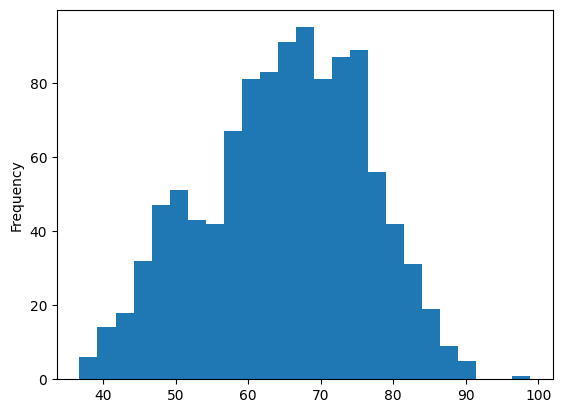

In [ ]:
df.toPandas()['air_temp_9am'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

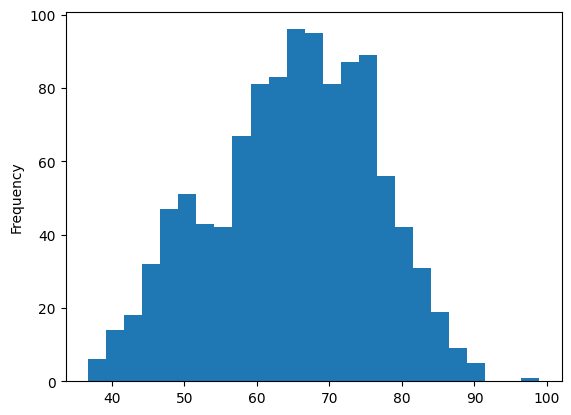

In [ ]:
imputeDF.toPandas()['air_temp_9am'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

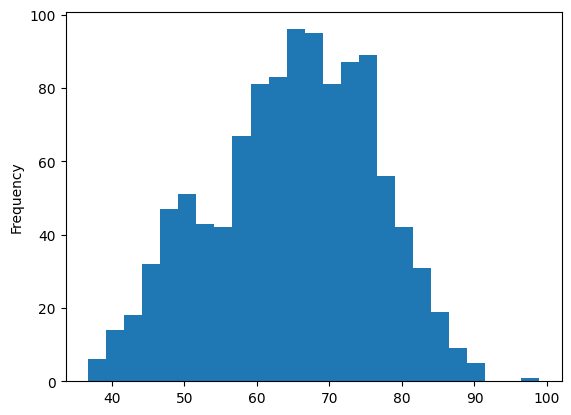

In [ ]:
imputeDF_median.toPandas()['air_temp_9am'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

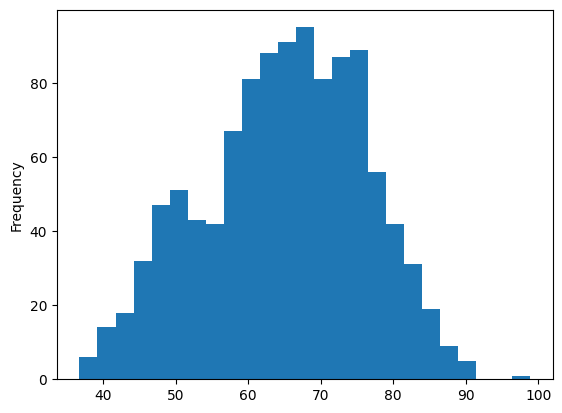

In [ ]:
imputeDF_mode.toPandas()['air_temp_9am'].plot.hist(bins=25)

**Коррелированные переменные** - присутствие в наборе данных линейно зависимых признаков.<br/>
Корреляцию между двумя столбцами можно подсчитать иcпользуя метод `corr()`. Для примера рассчитаем корреляцию между rain_accumulation_9am и rain_duration_9am:

In [ ]:
df2.stat.corr("rain_accumulation_9am", "rain_duration_9am")

0.7337737589869374

**Обработка категориальных признаков**<br/>
Данные для обработки и их описание можно скачать по ссылке: https://www.kaggle.com/c/ieee-fraud-detection
или https://drive.google.com/file/d/1SpFfqCufgElNtNFi-9YkRSkC70aTmUY4/view?usp=sharing


In [6]:
df_ti = spark.read.load("train_identity.csv",
                      format='com.databricks.spark.csv',
                      header='true',inferSchema='true')
# третий аргумент указывает, что первая строка является заголовком,
# четвертый аргумент указывает на вывод типов данных

df_ti.printSchema()

root
 |-- TransactionID: integer (nullable = true)
 |-- id_01: double (nullable = true)
 |-- id_02: double (nullable = true)
 |-- id_03: double (nullable = true)
 |-- id_04: double (nullable = true)
 |-- id_05: double (nullable = true)
 |-- id_06: double (nullable = true)
 |-- id_07: double (nullable = true)
 |-- id_08: double (nullable = true)
 |-- id_09: double (nullable = true)
 |-- id_10: double (nullable = true)
 |-- id_11: double (nullable = true)
 |-- id_12: string (nullable = true)
 |-- id_13: double (nullable = true)
 |-- id_14: double (nullable = true)
 |-- id_15: string (nullable = true)
 |-- id_16: string (nullable = true)
 |-- id_17: double (nullable = true)
 |-- id_18: double (nullable = true)
 |-- id_19: double (nullable = true)
 |-- id_20: double (nullable = true)
 |-- id_21: double (nullable = true)
 |-- id_22: double (nullable = true)
 |-- id_23: string (nullable = true)
 |-- id_24: double (nullable = true)
 |-- id_25: double (nullable = true)
 |-- id_26: double (null

Компьютер, в отличие от людей, умеет различать только числа и не понимает язык категорий. Большинство алгоритмов машинного обучения не могут обрабатывать категориальные переменные, если не преобразовать их в числовые значения.
Категориальные переменные можно разделить на два типа: номинальные (без конкретного порядка) и порядковые (упорядоченные). <br/>
Примеры номинальных переменных:
* красный, желтый, розовый
* Индия, Япония, Россия
* корова, собака, кошка

Примеры порядковых переменных:
* высокий, средний, низкий
* согласен, нейтрально, не согласен
* отлично, хорошо, плохо

Существуют различные подходы к обработке категориальных признаков. При этом показатели многих алгоритмов варьируются в зависимости от того, как кодируются категориальные переменные.

### *Label encoding (замена текстового представления признака на числовое)*
В этой кодировке каждой категории присваивается значение от 1 до N-1, где N – количество категорий для элемента. Основная проблема данного метода заключается в том, что между этими классами нет связи или порядка. Но все же ее можно рассматривать как порядок. Например, «холодный < горячий < очень горячий < теплый → 0 < 1 < 2 < 3»

In [7]:
# Label encoding - замена текстового представления признака на числовое
from pyspark.ml.feature import StringIndexer
df_ti=df_ti.na.drop(subset=['DeviceType'])

indexer = StringIndexer(inputCol="DeviceType", outputCol="DeviceTypeIndex")
indexed = indexer.fit(df_ti).transform(df_ti)

indexed.select('DeviceTypeIndex').distinct().show()


+---------------+
|DeviceTypeIndex|
+---------------+
|            0.0|
|            1.0|
+---------------+



### *One-hot encoding*
В этом методе каждая категория сопоставляется с вектором, содержащим 1 и 0, обозначая наличие или отсутствие элемента. Количество векторов зависит от количества категорий признаков. Этот метод значительно замедляет обучение при большом количестве категориальных признаков. Однако это самый популярный и понятный метод.

In [8]:
# One-hot encoding
from pyspark.ml.feature import OneHotEncoder


ohe = OneHotEncoder(inputCol="DeviceTypeIndex", outputCol="DeviceType_ohe")
ohe_data = ohe.fit(indexed).transform(indexed)

ohe_data.select('DeviceType_ohe').distinct().show()

+--------------+
|DeviceType_ohe|
+--------------+
| (1,[0],[1.0])|
|     (1,[],[])|
+--------------+



### *Frequency Encoding*
Этот способ использует частоту категорий в качестве меток. В случаях, когда частота связана с целевой переменной, это помогает модели понять и назначить вес в прямой и обратной пропорции, в зависимости от характера данных.
Для реализации кодирования необходимо:
* Выбрать категориальную переменную, которую необходимо преобразовать.
* Провести группировку по категориальной переменной, так получим количество наблюдений в каждой категории.
* Hазделить на количество и добавить в датасет.


In [9]:
from pyspark.sql.functions import count, col

count_DeviceType = df_ti.groupby('DeviceType').agg(count('*').alias('DeviceTypeCount'))

count_DeviceType = count_DeviceType.withColumn('DeviceType_enc', col('DeviceTypeCount') / df_ti.count())

df_en = df_ti.join(count_DeviceType, 'DeviceType', 'left').drop('DeviceTypeCount')

df_en.select('DeviceType_enc').distinct().show()

+-------------------+
|     DeviceType_enc|
+-------------------+
| 0.6048221007030751|
|0.39517789929692493|
+-------------------+



**Масштабирование переменных** требуется в случае, когда один из признаков принимает очень большие значения по сравнению со значениями других признаков. Существуют различные способы масштабирования.<br/>
1. **z-нормализация** <br/>
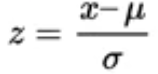 <br/>
где mu - среднее значение, sigma - среднеквадическое отклонение.<br/>

2. **Минимакс масштабирование**<br/>
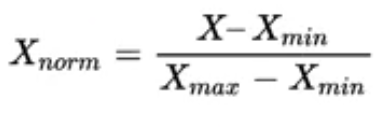

In [10]:
from pyspark.ml.feature import StandardScaler, MinMaxScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.functions import vector_to_array

# для ускорения работы, уберем пустые значения
# в реальности лучше не убирать, а обработать
df_notNull = df_ti.dropna()

df_notNull.show()

double_cols = [col_name for col_name, col_type in df_ti.dtypes if col_type == "double"]

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withMean=True, withStd=True)
assembler = VectorAssembler(inputCols=double_cols,
                            outputCol='features')
df_transformed = assembler.transform(df_notNull)
scaler_model = scaler.fit(df_transformed.select("features"))
df_scaled_standart = scaler_model.transform(df_transformed.select('features'))

df_scaled_standart = df_scaled_standart.drop('features').select([vector_to_array(col('scaledFeatures'))[i] for i in range(len(double_cols))])
df_scaled_standart = spark.createDataFrame(df_scaled_standart.collect(), schema=double_cols)
df_scaled_standart.show()

+-------------+------+--------+-----+-----+-----+------+-----+-----+-----+-----+-----+--------+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+--------------------+-----+-----+-----+-----+-----+-----+----------------+--------------------+-----+---------+--------------+-----+-----+-----+-----+----------+-----------+
|TransactionID| id_01|   id_02|id_03|id_04|id_05| id_06|id_07|id_08|id_09|id_10|id_11|   id_12|id_13| id_14|id_15|id_16|id_17|id_18|id_19|id_20|id_21|id_22|               id_23|id_24|id_25|id_26|id_27|id_28|id_29|           id_30|               id_31|id_32|    id_33|         id_34|id_35|id_36|id_37|id_38|DeviceType| DeviceInfo|
+-------------+------+--------+-----+-----+-----+------+-----+-----+-----+-----+-----+--------+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+--------------------+-----+-----+-----+-----+-----+-----+----------------+--------------------+-----+---------+--------------+-----+-----+-----+-----+----------+-----------+
|      298

In [11]:
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
assembler = VectorAssembler(inputCols=double_cols,
                            outputCol='features')
df_transformed = assembler.transform(df_notNull)
scaler_model = scaler.fit(df_transformed.select("features"))
df_scaled_MinMax = scaler_model.transform(df_transformed.select('features'))

df_scaled_MinMax = df_scaled_MinMax.drop('features').select([vector_to_array(col('scaledFeatures'))[i] for i in range(len(double_cols))])
df_scaled_MinMax = spark.createDataFrame(df_scaled_MinMax.collect(), schema=double_cols)
df_scaled_MinMax.show()

+-------------------+--------------------+-----+-----+-------------------+------------------+-------------------+------------------+------------------+------------------+-----+-------------------+-------------------+-----+-------------------+-------------------+--------------------+-------------------+-----+-------------------+------------------+--------------------+-----+
|              id_01|               id_02|id_03|id_04|              id_05|             id_06|              id_07|             id_08|             id_09|             id_10|id_11|              id_13|              id_14|id_17|              id_18|              id_19|               id_20|              id_21|id_22|              id_24|             id_25|               id_26|id_32|
+-------------------+--------------------+-----+-----+-------------------+------------------+-------------------+------------------+------------------+------------------+-----+-------------------+-------------------+-----+-------------------+------

**Выбросы** (нетипичные наблюдения)<br/>
1. Ящик с усами (boxplot)
2. Точечные диаграммы (scatter plot)
3. Z-оценка (z-score)

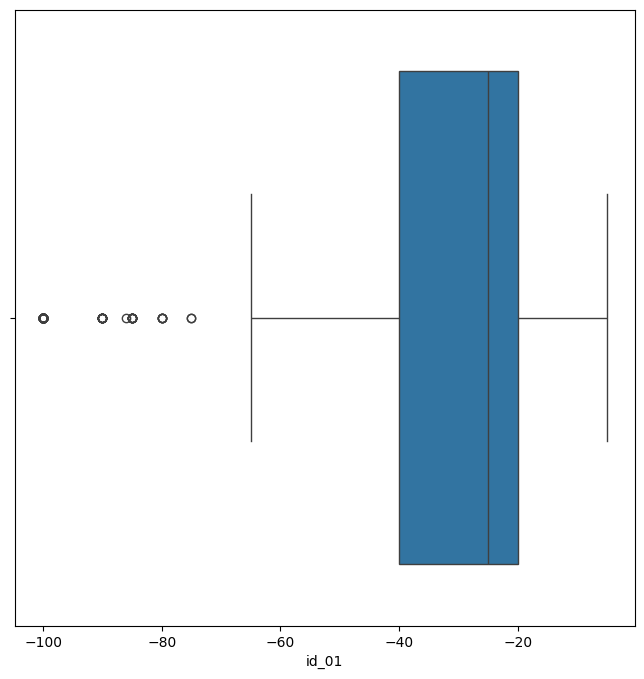

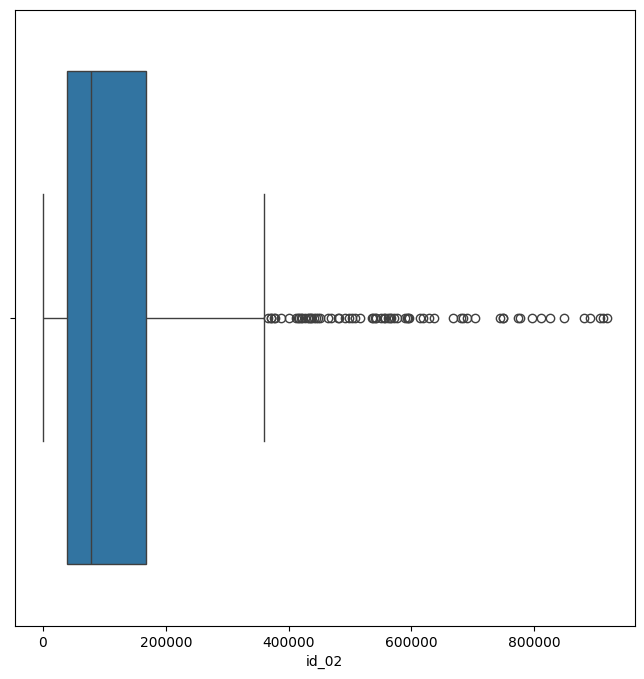

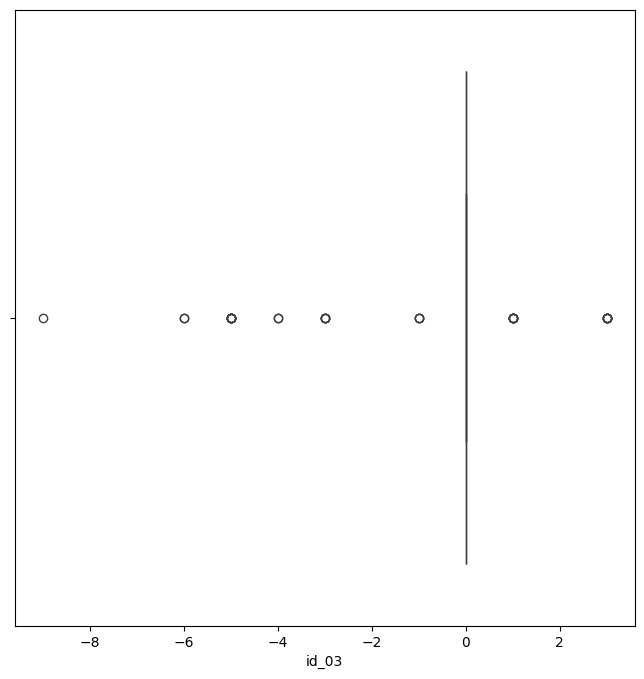

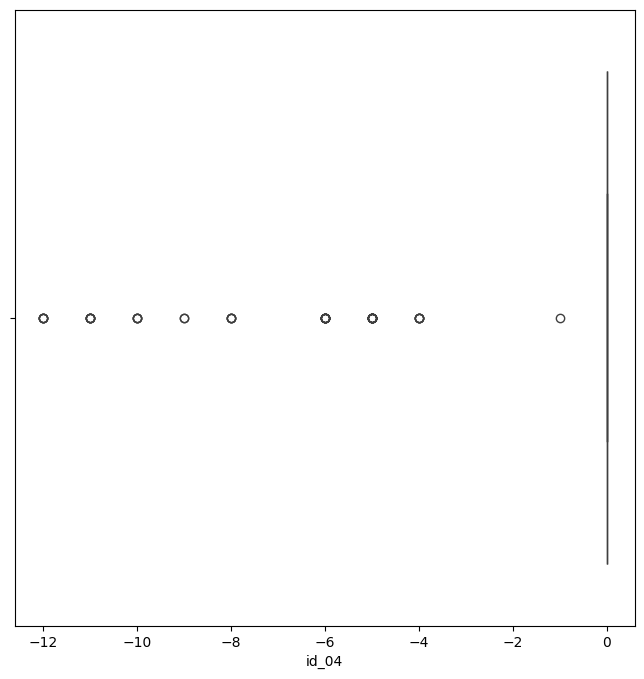

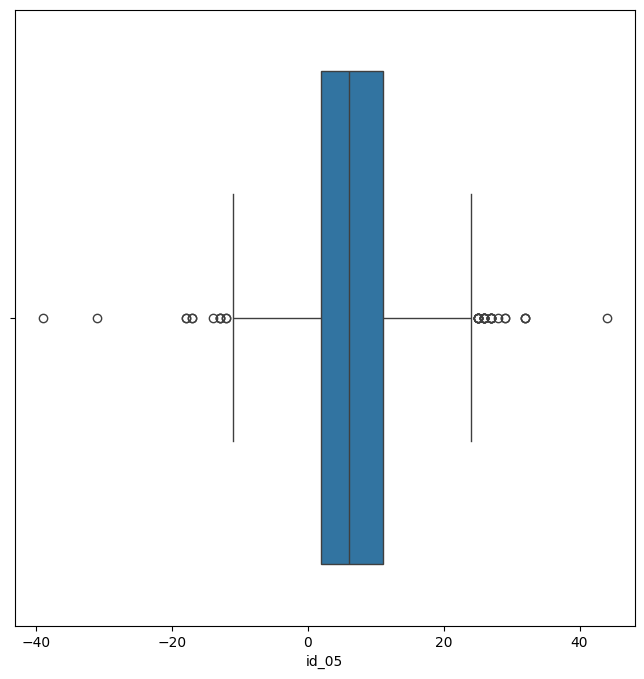

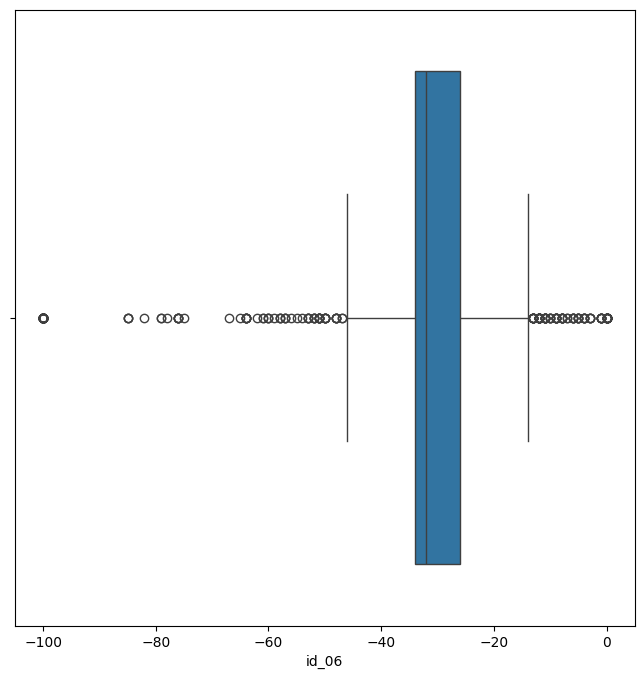

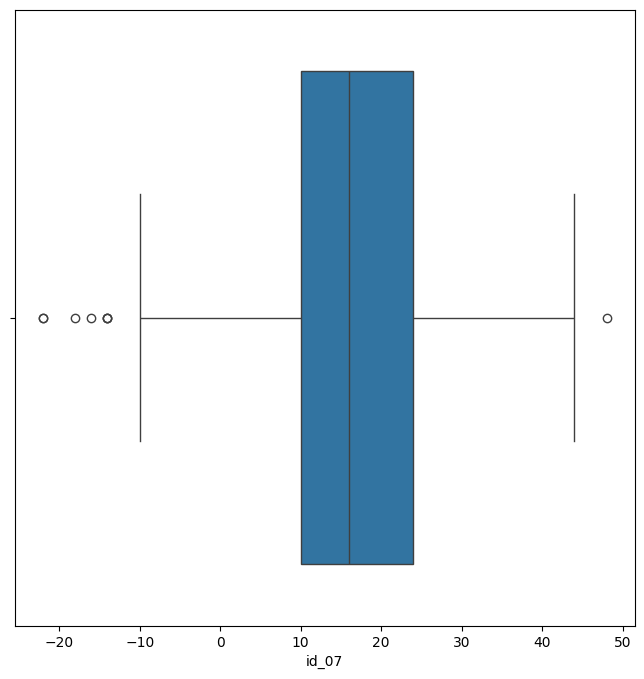

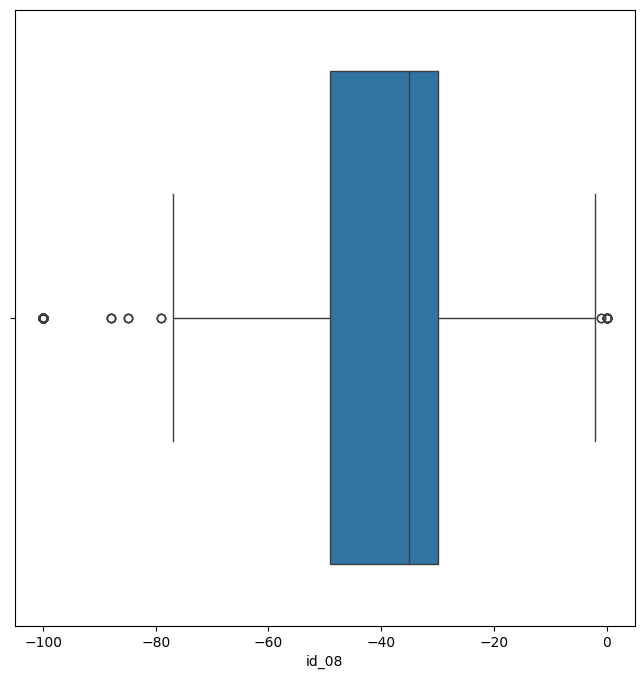

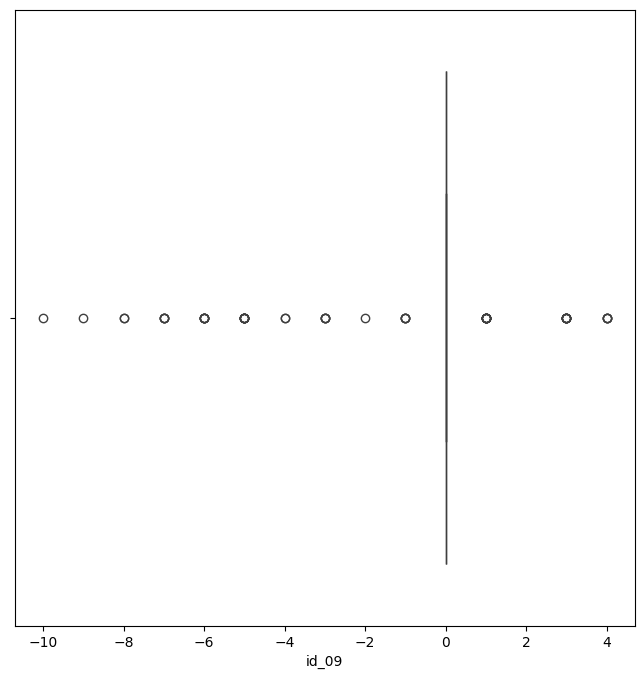

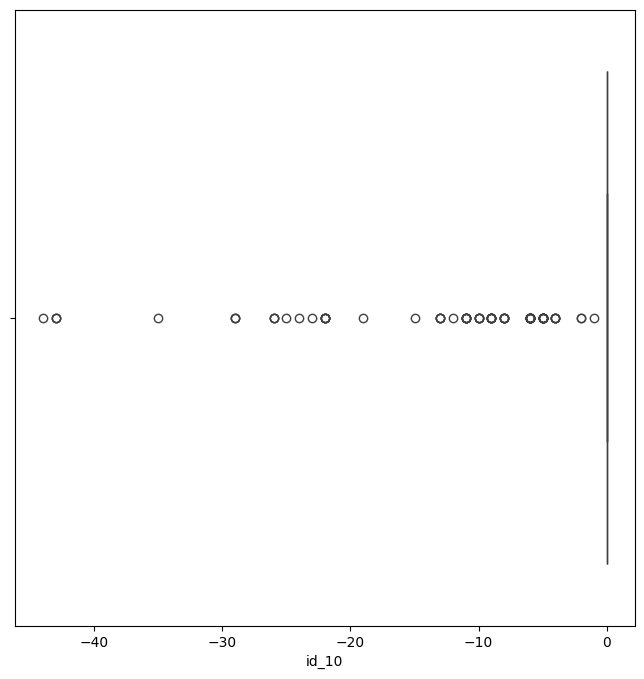

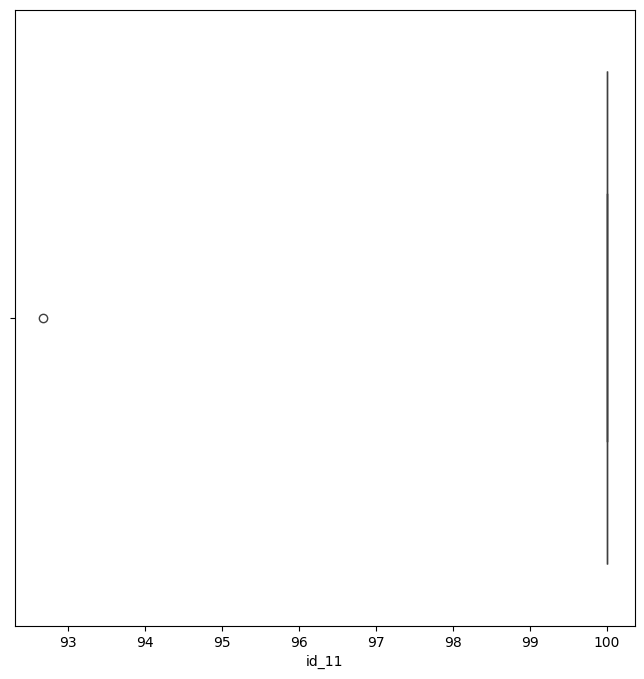

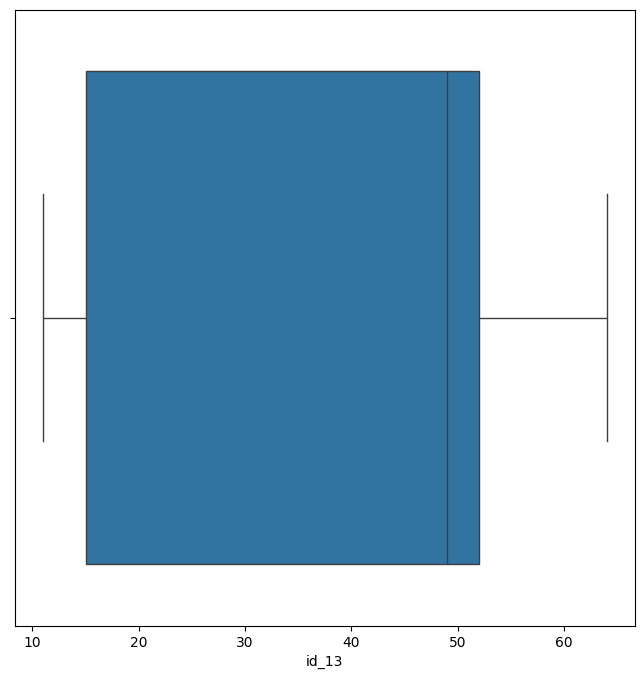

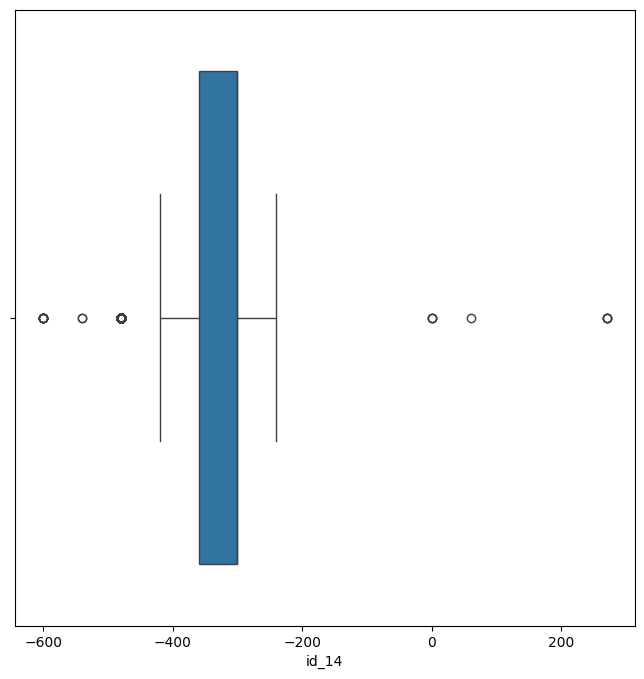

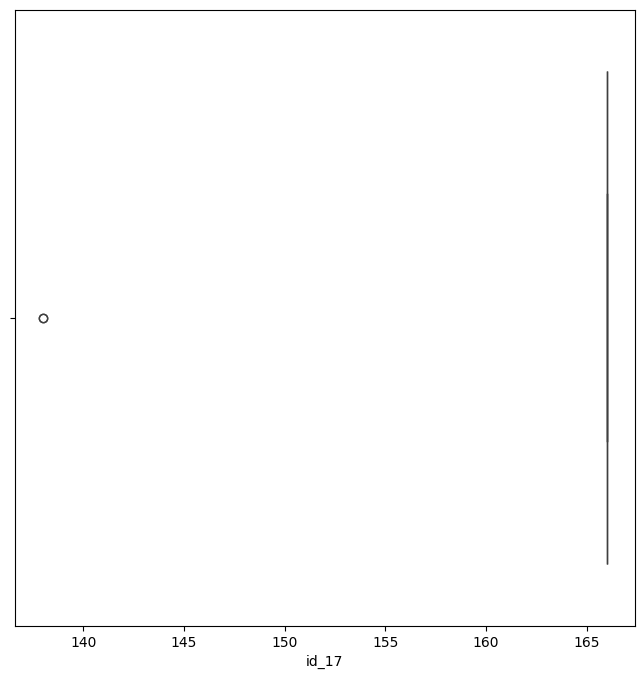

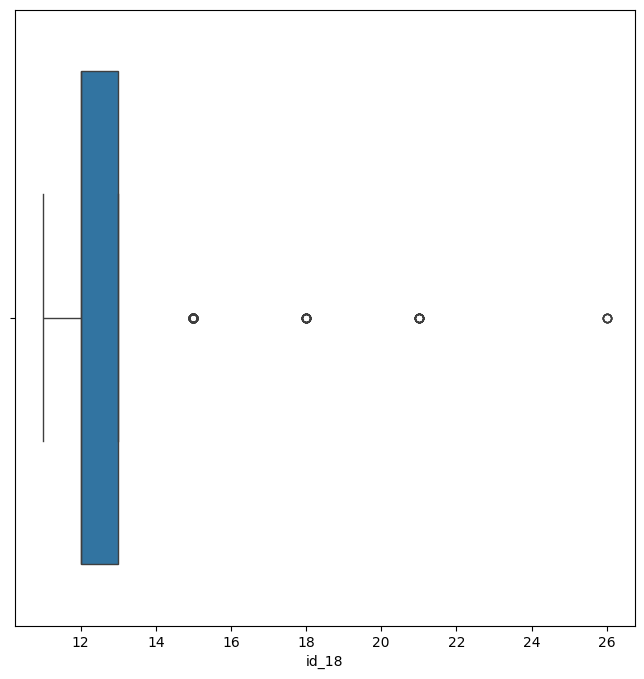

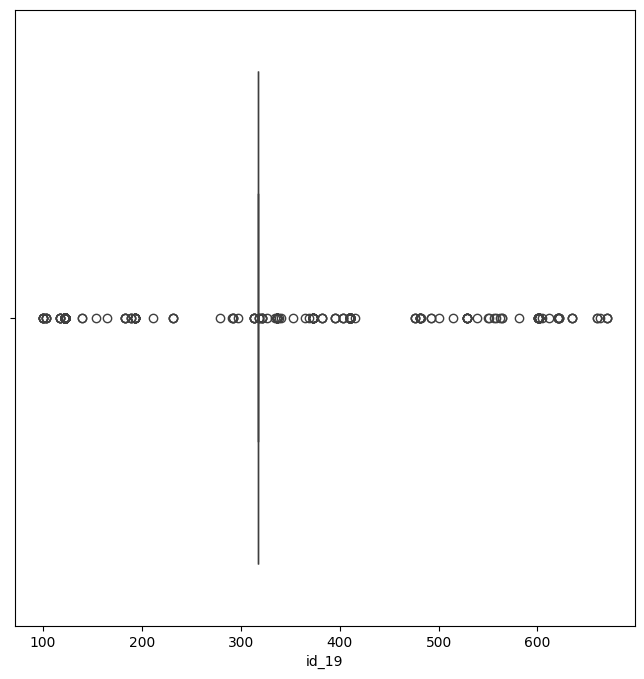

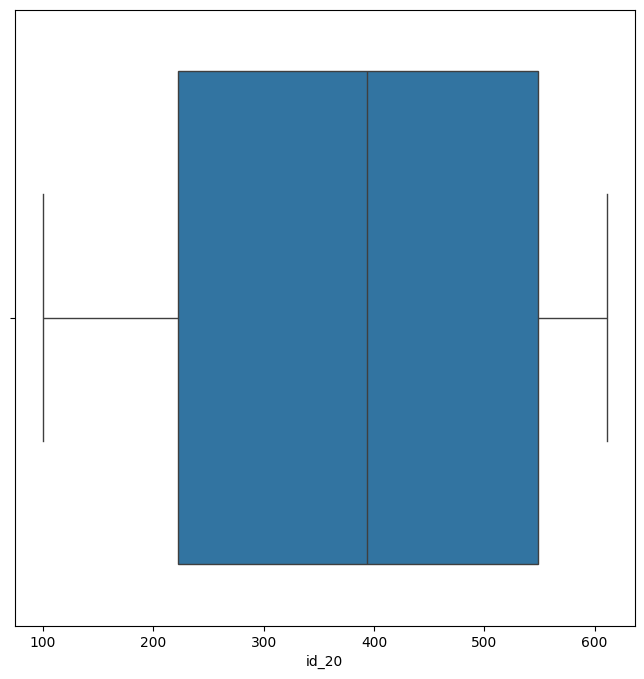

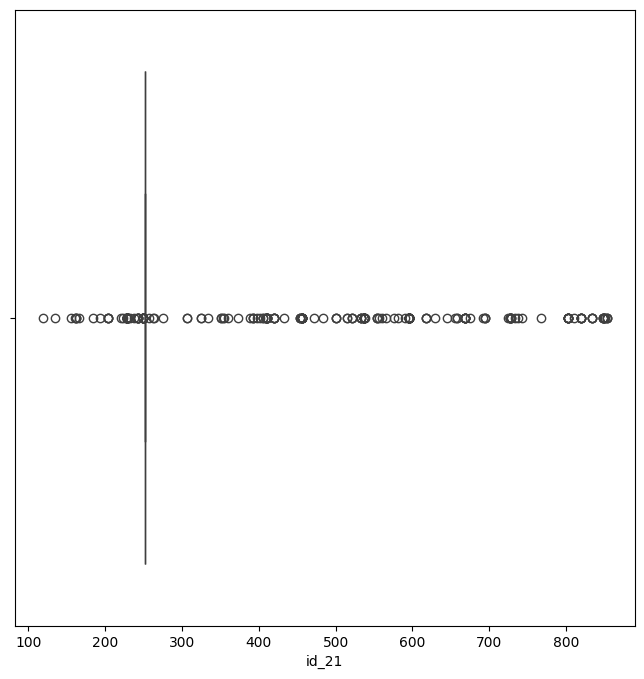

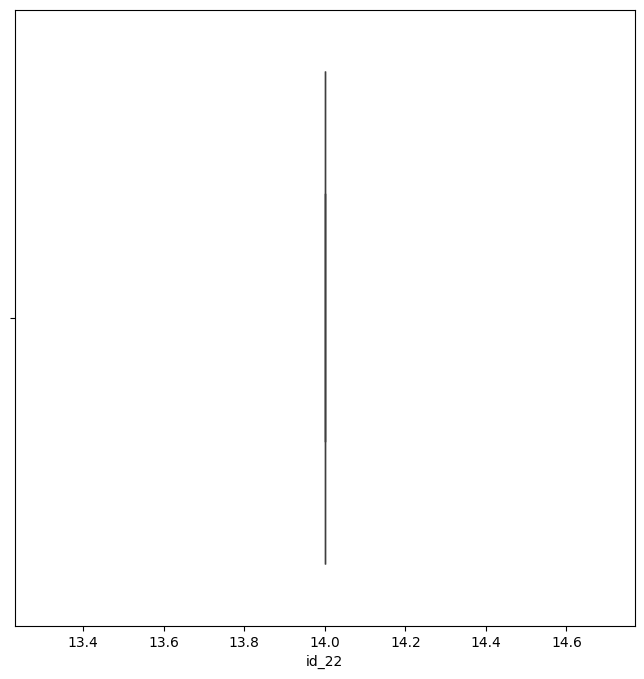

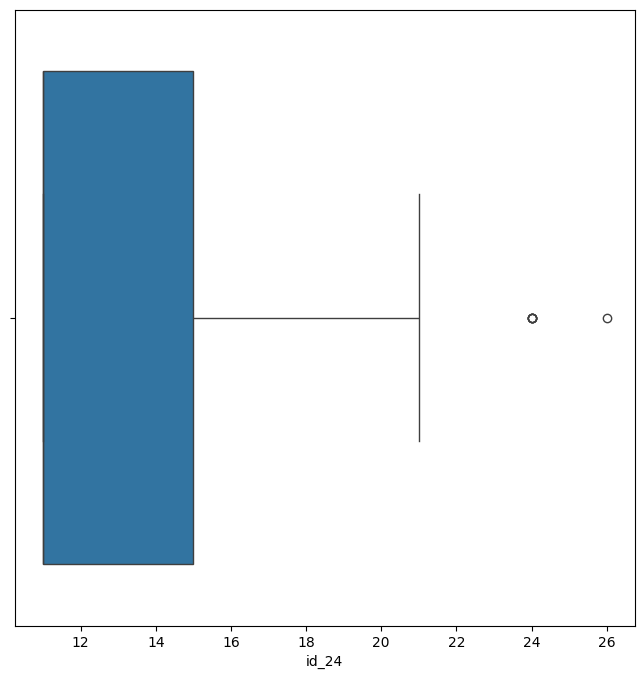

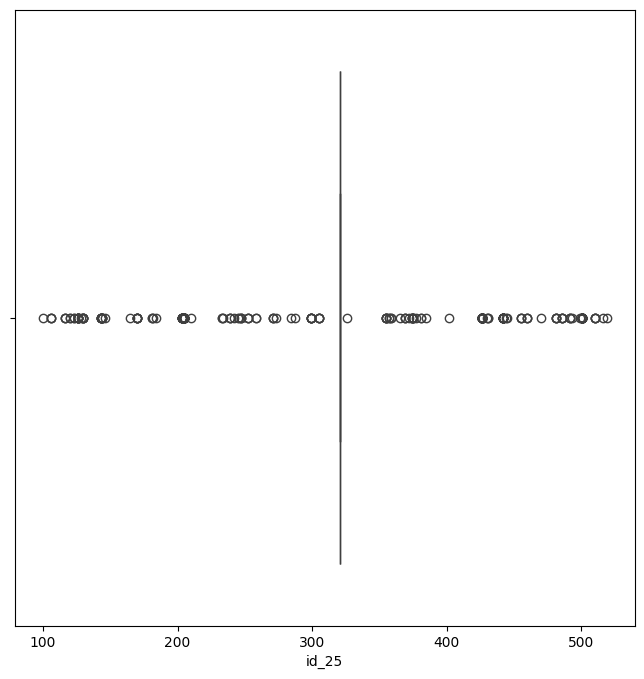

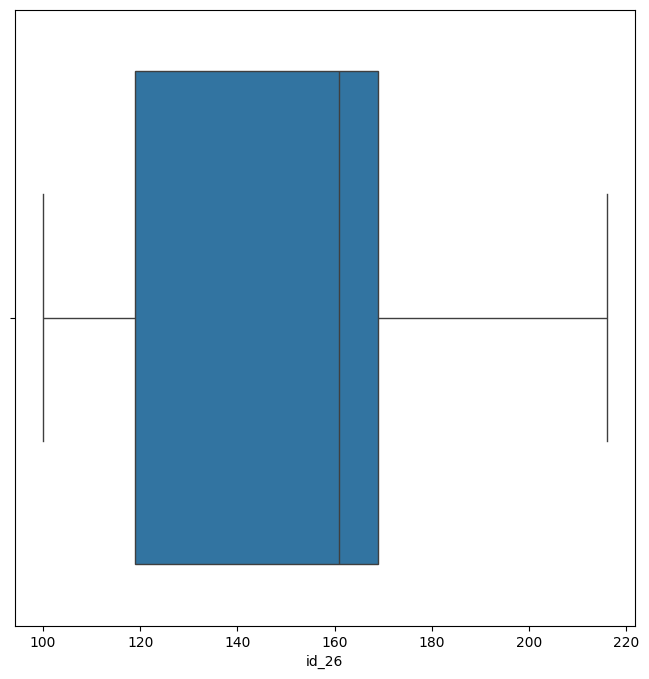

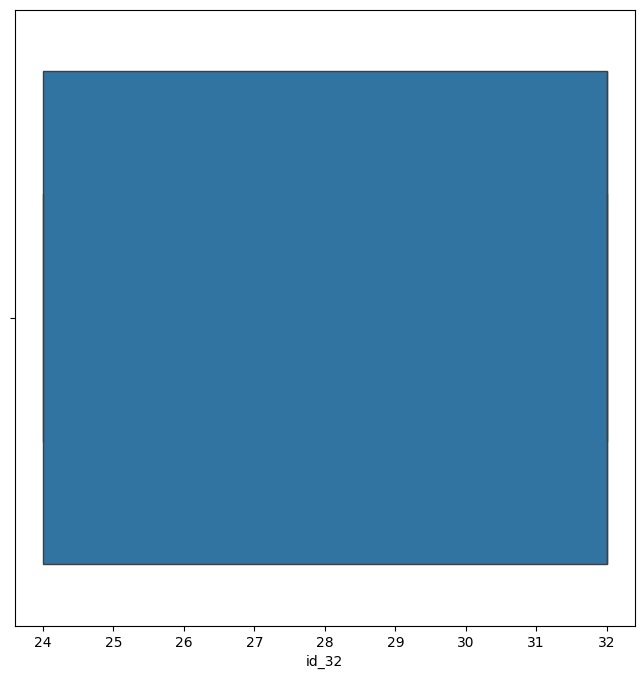

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_pd = df_ti.dropna().toPandas()[double_cols]

for column in df_pd.columns:
  plt.figure(figsize=(8,8))
  sns.boxplot(x=column, data=df_pd, orient='h')
  plt.show()

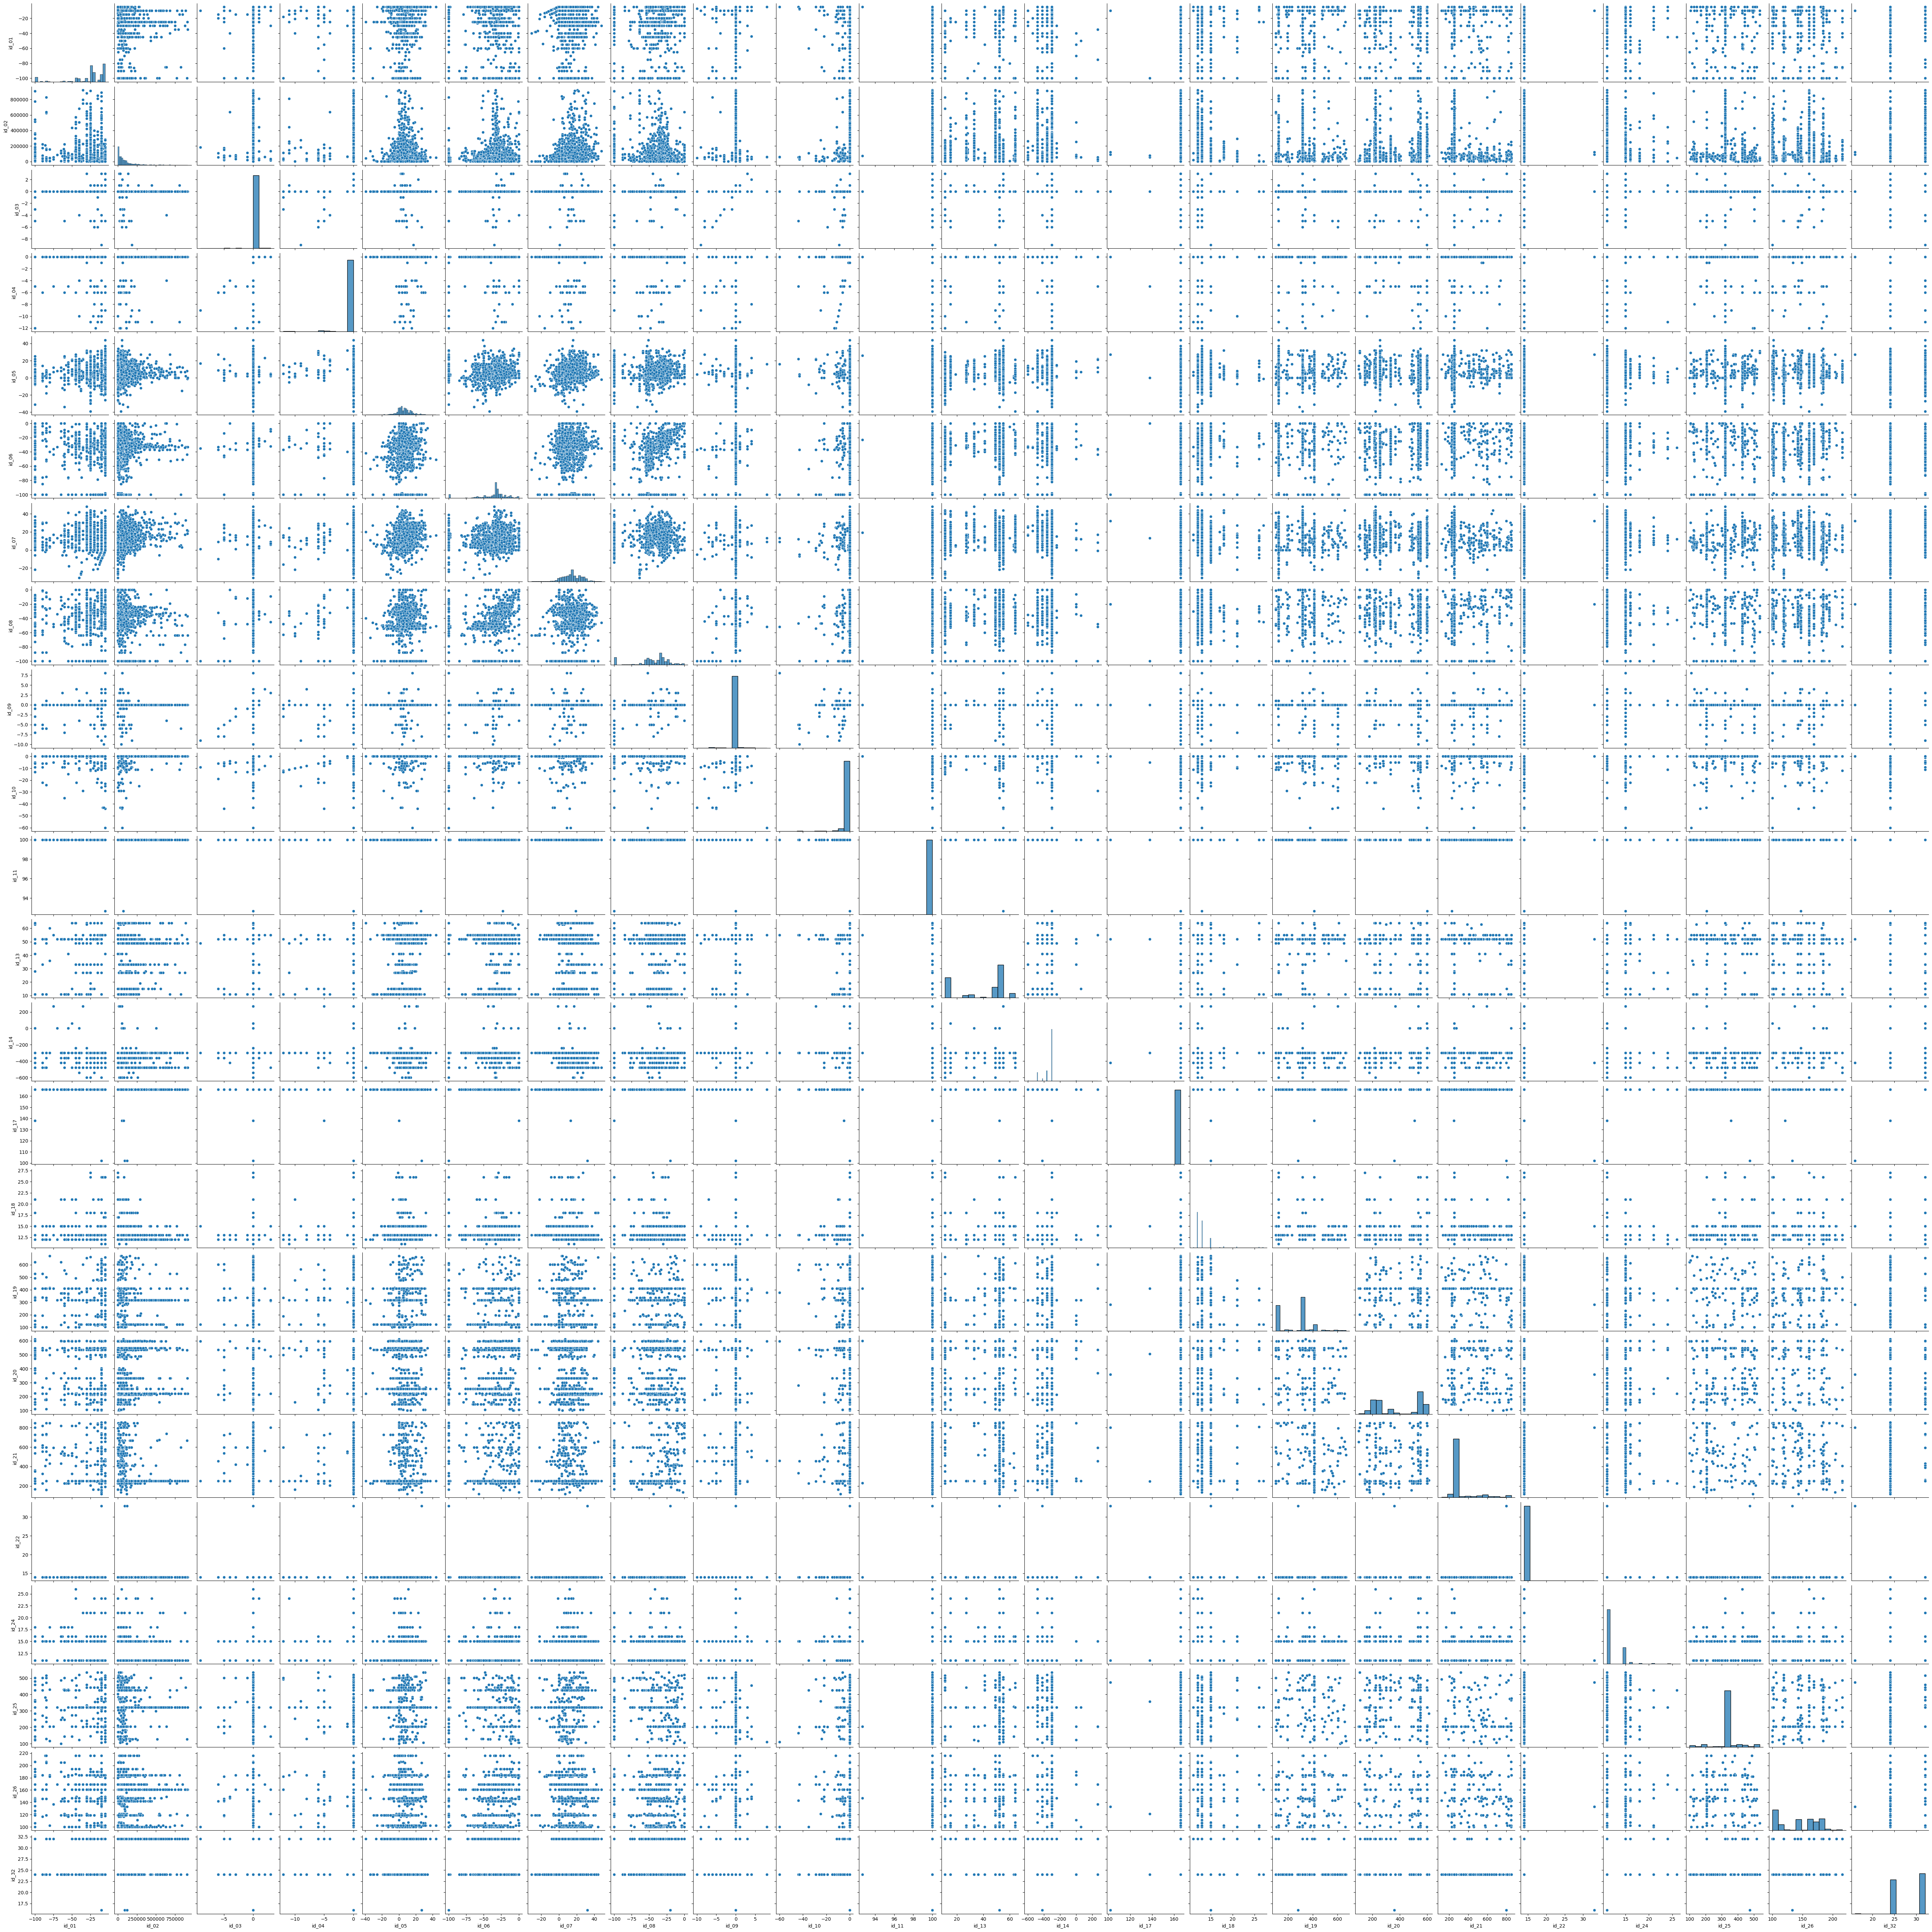

In [21]:
sns.pairplot(df_pd)

In [25]:
from scipy.stats import zscore

# Выбросы можно определить, присвоив порог Z-оценки, например, 2 или 3.
# Значения с Z-оценкой, превышающей этот порог, считаются выбросами
df_pd.apply(zscore)

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,0.859840,-0.024003,0.084253,0.224888,0.311609,-0.467629,0.561166,0.361754,0.111937,0.252994,...,0.046299,-0.467805,-1.707816,0.905110,-0.424818,NaN,-0.665850,-0.053352,1.140170,0.851523
1,0.481475,0.252658,0.084253,0.224888,0.818752,-0.024487,-1.344373,0.402545,0.111937,0.252994,...,0.046299,-0.467805,0.048868,0.905110,-0.424818,NaN,-0.665850,-0.053352,1.140170,0.851523
2,0.481475,-0.537774,0.084253,0.224888,0.691966,-0.024487,-1.344373,0.402545,0.111937,0.252994,...,0.046299,-0.467805,0.048868,0.905110,-0.424818,NaN,-0.665850,-0.053352,1.140170,0.851523
3,-0.842803,-0.321623,0.084253,0.224888,0.311609,-3.274194,0.084781,1.218366,0.111937,0.252994,...,0.046299,0.085163,0.481283,0.540151,-0.583227,NaN,-0.665850,1.368815,-1.060056,-1.174366
4,-2.545447,4.170847,0.084253,0.224888,-0.829464,1.600366,0.180058,-0.290904,0.111937,0.252994,...,0.046299,1.191098,1.958699,0.905110,-0.583227,NaN,-0.665850,1.368815,-0.928700,-1.174366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.103110,0.875909,0.084253,0.224888,0.311609,-0.024487,-0.010496,-0.005366,0.111937,0.252994,...,0.046299,-0.467805,0.048868,1.215324,-0.424818,NaN,-0.665850,-0.053352,-0.074880,0.851523
931,1.049023,-0.642460,0.084253,0.224888,-1.590180,0.172465,0.846997,0.361754,0.111937,0.252994,...,0.046299,-0.467805,0.048868,-1.083913,-0.424818,NaN,-0.665850,1.585526,0.384868,0.851523
932,1.049023,-0.648744,0.084253,0.224888,-1.590180,0.172465,1.037551,0.361754,0.111937,0.252994,...,0.046299,-0.467805,0.048868,-1.083913,-0.424818,NaN,-0.665850,1.585526,0.384868,0.851523
933,0.481475,-0.854519,0.084253,0.224888,1.072324,0.024751,0.370612,-2.330457,0.111937,0.252994,...,0.046299,-0.467805,0.048868,0.819953,-0.424818,NaN,-0.665850,-0.053352,0.647582,0.851523
